<a href="https://colab.research.google.com/github/Zen-trepreneur/Udacity--AI-for-Trading/blob/master/Dual_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install alpha_vantage

     |████████████████████████████████| 1.2MB 3.9MB/s 
     |████████████████████████████████| 266kB 16.3MB/s 
     |████████████████████████████████| 153kB 17.6MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=241f7a7de35bc2aae0c06990da5b4ba8d117179b134c57a93a54d3af89208e8a
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=9ce84a9ad4684ad2d0a1e0a4b878d4a58f6c157a953c1cd4c22070df2b5f29d4
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


                          SMA  4. close
date                                   
2020-07-14 07:12:00  207.5440    204.28
2020-07-14 07:13:00  207.5515    203.98
2020-07-14 07:14:00  207.5485    204.01
2020-07-14 07:15:00  207.5427    204.00
2020-07-14 07:16:00  207.5403    203.99
...                       ...       ...
2020-07-27 19:54:00  204.1863    207.40
2020-07-27 19:55:00  204.1947    207.40
2020-07-27 19:56:00  204.2013    207.45
2020-07-27 19:57:00  204.2078    207.25
2020-07-27 19:59:00  204.2132    206.90

[7461 rows x 2 columns]


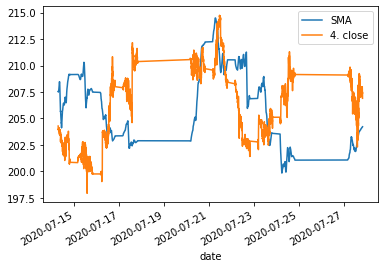

In [27]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

api_key = 'RNZPXZ6Q9FEFMEHM'

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')

period = 60

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', interval='1min',
                                    time_period=period, series_type='close')

df1 = data_ti
df2 = data_ts['4. close'].iloc[period-1::]

df2.index = df1.index

total_df = pd.concat([df1, df2], axis=1)
print(total_df)

total_df.plot()
plt.show()
